In [ ]:
"""
    First basic livetracking graph.
    Consist of motor, sensor and ultrasound values
"""

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

plt.ion()

while True:
    data = pd.read_csv("output.csv")
    
    left_motor = data['left motor'].values
    left_motor_norm = left_motor / 1000
    right_motor = data['right motor'].values
    right_motor_norm = right_motor / 1000
    total_motor_norm = (left_motor+right_motor) / 1000
    
    left_sensor = data['left sensor'].values
    right_sensor = data['right sensor'].values
    total_sensor = left_sensor + right_sensor
    
    left_us_sensor = data['left ultrasound sensor'].values
    right_us_sensor = data['right ultrasound sensor'].values
    sensor = data['left sensor'].values + data['right sensor'].values

    plt.plot(left_sensor)
    plt.plot(right_sensor)
    plt.axis('tight')
    plt.legend(['left_motor_norm','right_motor_norm','left_sensor','right_sensor','left motor','right motor'])

    clear_output(wait=True)
    plt.pause(1)

while True:
    clear_output(wait=True)
    plt.pause(1)



In [ ]:
"""
    Livetracking of a heatmap of a normalized motor, sensor and ultrasound values.
"""

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
while True:
    plt.figure(figsize=(10,10))
    data = pd.read_csv("output.csv")

    data['right motor'] = data['right motor'].values/1000
    data['left motor'] = data['left motor'].values/1000

    im = plt.imshow(data,cmap='hot',aspect='auto')
    plt.colorbar(im,orientation='horizontal')
    
    clear_output(wait=True)
    plt.pause(1)


while True:
    clear_output(wait=True)
    plt.pause(1)


In [ ]:
"""
    6 side-by-side graph of all the sensor, motor and ultrasound values
"""

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

plt.ion()

while True:
    grid = plt.figure(figsize=(20,10))
    ls = grid.add_subplot(321)
    plt.title("Left Light Sensor")
    rs = grid.add_subplot(322)
    plt.title("Right Light Sensor")
    luv = grid.add_subplot(323)
    plt.title("Left UltraViolet Sensor")
    ruv = grid.add_subplot(324)
    plt.title("Right UltraViolet Sensor")
    lm = grid.add_subplot(325)
    plt.title("Left Motor")
    rm = grid.add_subplot(326)
    plt.title("Right Motor")

    data = pd.read_csv("output.csv")
    time = np.arange(0, data.shape[0]/20, 0.05) # To get how many seconds has the program been running
    lmv = data['left motor'].values
    rmv = data['right motor'].values
    lsv = data['left sensor'].values
    rsv = data['right sensor'].values
    luvv = data['left ultrasound sensor'].values
    ruvv = data['right ultrasound sensor'].values
    
    ls.plot(time, lsv, label='left-light')
    ls.set_ylim(0, 0.5)
    
    rs.plot(time, rsv, label='right-light')
    rs.set_ylim(0, 0.5)

    luv.plot(time, luvv, label='left-uv')
    luv.set_ylim(0, 0.8)
    luv.autoscale(enable=True,axis='both')
    
    ruv.plot(time, ruvv, label='right-uv')
    ruv.set_ylim(0, 0.8)
    ruv.autoscale(enable=True,axis='both')
    
    lm.plot(time, lmv, label='left-motor')
    lm.set_ylim(-500, 500)
    lm.autoscale(enable=True,axis='both')

    rm.plot(time, rmv, label='right-motor')
    rm.set_ylim(-500, 500)
    rm.autoscale(enable=True,axis='both')
    
    clear_output(wait=True)
    plt.pause(1)
    
while True:
    clear_output(wait=True)
    plt.pause(1)



In [ ]:
"""
    State transition between bins
"""

from DataManipulation import DataManipulation
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections
import pandas as pd
import networkx as nx
from IPython.display import clear_output

plt.ion()

# Print the whole array rather than just a subset of the array
np.set_printoptions(threshold=np.nan,suppress=True)

# Necessary for livetracking
while True:
    grid = plt.figure(figsize=(10,10))
    #Add position for the plot with 211 being 2 row 1 column and position 1
    ls = grid.add_subplot(211)
    plt.title("Transition plot between Sensor and Motor states")
    plt.xlabel("Sensor")
    plt.ylabel("Motor")
    rs = grid.add_subplot(212)
    plt.title("Transition plot between Ultrasound and Motor states")
    plt.xlabel("Ultrasound")
    plt.ylabel("Motor")
    
    # Reading output.csv and normalizing the data
    data = DataManipulation("../server/angle0.csv")
    NUM_OF_BINS = data.get_NUM_OF_BINS()
    data.normalized_motor()
    motor_values,sensor_values,us_values = data.normalized_0_to_1()
    
    #Making a state transition between sensor and motor values
    sensor_and_motor = data.convert_values_to_bins(sensor_values,motor_values)
    transition_array = data.remove_continous_state()
    transition_with_frequency = data.transition_frequency(transition_array)
    G = nx.DiGraph()
    G.add_nodes_from(transition_with_frequency.keys())
    for i,j in transition_with_frequency.items():
        for k,l in j.items():
            G.add_weighted_edges_from([(i, k, l)])

    # This resulted in an array where for every 3 values of the array such as [A,B,C],
    # A is source state, B is destination state and C is frequency of transition from A to B
    most_visited_state = data.most_visited_state_transition(transition_with_frequency)
    
    # Separating the values in the array to bins
    xArray,yArray = data.digitize_total_values(transition_array, type='2d')

    # Making the arrow transition between bins
    # Can use quiver but this one looks better
        
    for i in range(0,len(xArray)-1,3):
        test = ls.annotate(
            '', # text to be displayed
            xy=(xArray[i+1],yArray[i+1]), # to here
            xycoords='data',
            xytext=(xArray[i],yArray[i]), # arrow starts from here
            textcoords='data',
            horizontalalignment='left', # so we can actually see the frequency displayed 
            verticalalignment='bottom',
            arrowprops=dict(facecolor='black', arrowstyle="-|>", shrinkB=0.1, alpha=0.4)
        )
        
    # Making a state transition between ultrasound and motor values
    us_and_motor = data.convert_values_to_bins(us_values,motor_values)
    transition_array = data.remove_continous_state()
    transition_with_frequency = data.transition_frequency(transition_array)
    most_visited_state = data.most_visited_state_transition(transition_with_frequency)
    xArray,yArray,zArray = data.digitize_total_values(transition_array, type='3d')

    for i in range(0,len(xArray)-1,3):
        test = rs.annotate(
            '',
            xy=(xArray[i+1],yArray[i+1]), # to here
            xycoords='data',
            xytext=(xArray[i],yArray[i]), # arrow starts from here
            textcoords='data',
            horizontalalignment='left',
            verticalalignment='bottom',
            arrowprops=dict(facecolor='black', arrowstyle="-|>", shrinkB=0.1, alpha=0.3)
        )
    
    ls.set_xlim(-1,NUM_OF_BINS)
    ls.set_ylim(-1,NUM_OF_BINS)
    rs.set_xlim(-1,NUM_OF_BINS)
    rs.set_ylim(-1,NUM_OF_BINS)
    
    # Necessary for livetracking
    clear_output(wait=True)
    plt.pause(1)

# Necessary for livetracking
while True:
    clear_output(wait=True)
    plt.pause(1)
    

In [ ]:
"""
    3D state transition graph
"""

%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

plt.ion()
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

mpl.style.use('default')

# Reading output.csv and normalizing the data
data = DataManipulation("../server/angle0.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
motor_values,sensor_values,us_values = data.normalized_0_to_1()

#Making a state transition between sensor and motor values
sensor_and_motor = data.convert_values_to_bins(sensor_values,motor_values)
transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)
most_visited_state = data.most_visited_state_transition(transition_with_frequency)

# Separating the values in the array to bins
xArray, yArray, zArray = data.digitize_total_values(most_visited_state, type='3d')

# Plotting the 3d quiver for every 3 values in the array with [A,B,C] 
# where A is source state, B is destination state, C is frequency
sc = ax.quiver(xArray[:-1:3], yArray[:-1:3], zArray[:-1:3], 
        xArray[1::3]-xArray[:-1:3],yArray[1::3]-yArray[:-1:3],zArray[1::3]-zArray[:-1:3],
        normalize=True,cmap=plt.cm.RdYlBu)

# Making a trend line in 3d graph
# taken from https://stackoverflow.com/questions/2298390/fitting-a-line-in-3d
data2 = np.concatenate((xArray.astype(float)[:, np.newaxis], 
                       yArray.astype(float)[:, np.newaxis], 
                       zArray.astype(float)[:, np.newaxis]), 
                      axis=1)

# Perturb with some Gaussian noise
data2 += np.random.normal(size=data2.shape) * 0.4

# Calculate the mean of the points, i.e. the 'center' of the cloud
datamean = data2.mean(axis=0)

# Do an SVD on the mean-centered data.
uu, dd, vv = np.linalg.svd(data2 - datamean)

# Now vv[0] contains the first principal component, i.e. the direction
# vector of the 'best fit' line in the least squares sense.

# Now generate some points along this best fit line, for plotting.

# I use -7, 7 since the spread of the data is roughly 14
# and we want it to have mean 0 (like the points we did
# the svd on). Also, it's a straight line, so we only need 2 points.
linepts = vv[0] * np.mgrid[-5:5:2j][:, np.newaxis]

# shift by the mean to get the line in the right place
linepts += datamean

ax.set_xlabel('Sensor')
ax.set_ylabel('Motor')
ax.set_zlabel('Ultrasound')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)
ax.set_title("3d normalized values between sensor, motor, and ultrasound")
ax.legend()

plt.show()


In [ ]:
"""
LIGHT-MOTOR MAP

This graph represents the relationship between the combined amount of light detected
and the combined speed of the motors with vectors. This was to show the transitions between
different sensorimotor states in a 2D light-motor space.
"""
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
import timeit
from DataManipulation import DataManipulation

#A timer to measure how long each iteration executes.
start_time = timeit.default_timer()

plt.ion()

while True:
    plt.figure(figsize=(20,20))
    #Read light and motor values, and add the left and right sides together for 
    #combined light and combined motor values
    listname = ["../server/angle0.csv","../server/angle45.csv","../server/angle-30.csv"]
    colorlist= ['red','blue','green','purple','orange']
    
    listplot = []
    xArray = []
    yArray = []
    for i in range(len(listname)):
        data = DataManipulation(listname[i])

        x = data.get_data()['left sensor'].values + data.get_data()['right sensor'].values
        y = data.get_data()['left motor'].values + data.get_data()['right motor'].values
        plt.subplot(211)
        #Add titles and labels
        plt.title("Motor Speed vs Relative Light w/ Vectors")
        plt.xlabel('Light')
        plt.ylabel('Motor Speed')
        plott, = plt.plot(x, y, label="Sensory-Motor path", alpha=0.5, color=colorlist[i])
        listplot.append(plott)
        xArray.extend(x)
        yArray.extend(y)
        #Add vectors to indicate direction of state transitions.
        plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], 
                   scale_units='xy', angles='xy', scale=1, alpha=0.5, color=colorlist[i])
    
    plt.legend(listplot, ['Angle 0', 'Angle 45', 'Angle -30', 'Angle -45', 'Angle -90'], prop={'size': 20})
    
    #Plotting an additional scatterplot for recording frequency of the visits to specific states
    plt.subplot(212)
    plt.hist2d(xArray, yArray, norm=mpl.colors.LogNorm(), bins=11, cmap=plt.cm.YlGnBu)
    plt.title("Motor Speed vs Relative Light w/ Colour Plot")
    plt.xlabel('Light')
    plt.ylabel('Motor Speed')   
    plt.colorbar(orientation='horizontal', label='Frequency of visits')
    
    #Pause for 1 second to give time for graph to update
    clear_output(wait=True)
    plt.pause(1)
    
    #Elapsed time printout for determining execution time of each iteration
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
    start_time = timeit.default_timer()

while True:
    clear_output()
    plt.pause(1)

In [ ]:
"""
Cycle graph with reduced dimension

A 6 dimensional cycle where we visualised it in 3 dimensional space with dimensions of our choice.
Just to prove that the cycle exist in whatever dimensions
"""

%matplotlib notebook
from DataManipulation import DataManipulation
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections
import pandas as pd
import networkx as nx
import mdp
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D

plt.ion()

# Print the whole array rather than just a subset of the array
np.set_printoptions(threshold=np.nan,suppress=True)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# Reading output.csv and normalizing the data
data = DataManipulation("../server/angle0.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

# For some reason the value goes up to NUM_OF_BINS after normalized.
# Temporary fix
for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)

transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)

G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    # J is a dictionary in a dictionary
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])

for i in nx.simple_cycles(G):
    if len(i) < 8:
        continue
    # To make a full list of cycle, initially it's just A B C
    # This transform A B C -> A B C A
    i.append(i[0])
    print(i)
    to_be_digitized = np.array(i)
    # ls, rs, lus, rus, lm, rm
    xArray, yArray, zArray, wArray, uArray, vArray = data.digitize_cycle(to_be_digitized)

    # Make a quiver plot to include all of the value from uArray,vArray,wArray.
    # Array can be changed with combination of the 6 sensor array
    ax.quiver(uArray[:-1], vArray[:-1], wArray[:-1], 
        uArray[1:]-uArray[:-1],vArray[1:]-vArray[:-1],wArray[1:]-wArray[:-1],
        cmap=plt.cm.RdYlBu)
    
ax.set_xlabel('Left Motor')
ax.set_ylabel('Right Motor')
ax.set_zlabel('Right US')
ax.set_title('3 dimensional representation of cycle')

/home/teddy/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/teddy/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/teddy/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  

Length of array: 9
Original data: 
[[1 0 0 2 3 6]
 [1 0 0 0 5 6]
 [1 1 0 0 5 5]
 [1 0 0 0 5 5]
 [1 0 0 1 3 6]
 [1 0 0 3 2 6]
 [1 0 0 3 1 6]
 [1 0 0 2 2 6]
 [1 0 0 2 3 6]]
Projection matrix: 
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [ -8.17700385e-02   6.46854457e-01  -8.28236038e-02  -7.53679788e-01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -3.46944695e-16   6.10622664e-16  -3.60822483e-16
   -1.00000000e+00   0.00000000e+00]
 [  6.26311066e-01   1.85402143e-01   7.57163813e-01   7.96583277e-03
    3.33066907e-16   0.00000000e+00]
 [ -7.58411292e-01  -7.27249643e-02   6.45688177e-01  -5.10898251e-02
    4.44089210e-16   0.00000000e+00]
 [  1.60811759e-01  -7.36149737e-01   5.41293772e-02  -6.55204665e-01
    4.99600361e-16   0.00000000e+00]]
PCA result: 
[[  5.61307941e-01  -1.16299254e-01   2.98391674e-01  -4.60800809e-02
    1.97372982e-16   0.00000000e+00]
 [ -2.20813677e+00  -6.32553469e-01   7.544040

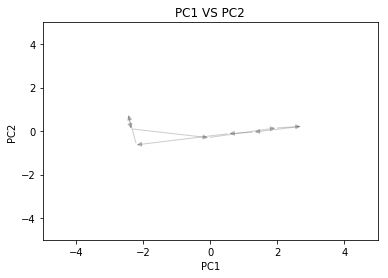


Length of array: 4
Original data: 
[[0 1 0 0 5 5]
 [0 1 0 0 5 4]
 [0 1 1 0 5 4]
 [0 1 0 0 5 5]]
Projection matrix: 
[[-0.         -0.          1.          0.          0.          0.        ]
 [-0.         -0.          0.          1.          0.          0.        ]
 [-0.61541221  0.78820544  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.78820544  0.61541221  0.          0.          0.          0.        ]]
PCA result: 
[[ 0.54795577  0.11065475  0.          0.          0.          0.        ]
 [-0.24024967 -0.50475746  0.          0.          0.          0.        ]
 [-0.85566188  0.28344797  0.          0.          0.          0.        ]
 [ 0.54795577  0.11065475  0.          0.          0.          0.        ]]


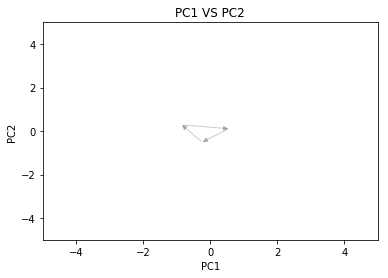


There is only one principal component.
Length of array: 3
Original data: 
[[0 1 0 0 5 5]
 [1 1 0 0 5 5]
 [0 1 0 0 5 5]]
Projection matrix: 
[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
PCA result: 
[[-0.33333333  0.          0.          0.          0.          0.        ]
 [ 0.66666667  0.          0.          0.          0.          0.        ]
 [-0.33333333  0.          0.          0.          0.          0.        ]]


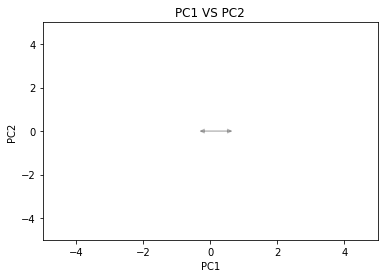


There is only one principal component.
Length of array: 3
Original data: 
[[1 0 0 0 5 5]
 [1 1 0 0 5 5]
 [1 0 0 0 5 5]]
Projection matrix: 
[[ 0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
PCA result: 
[[-0.33333333  0.          0.          0.          0.          0.        ]
 [ 0.66666667  0.          0.          0.          0.          0.        ]
 [-0.33333333  0.          0.          0.          0.          0.        ]]


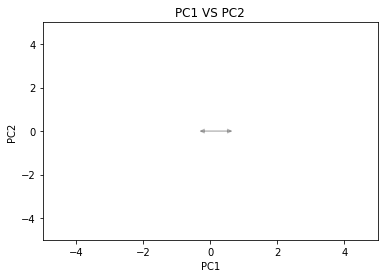


There is only one principal component.
Length of array: 3
Original data: 
[[1 1 0 0 5 5]
 [1 1 0 0 6 5]
 [1 1 0 0 5 5]]
Projection matrix: 
[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
PCA result: 
[[-0.33333333  0.          0.          0.          0.          0.        ]
 [ 0.66666667  0.          0.          0.          0.          0.        ]
 [-0.33333333  0.          0.          0.          0.          0.        ]]


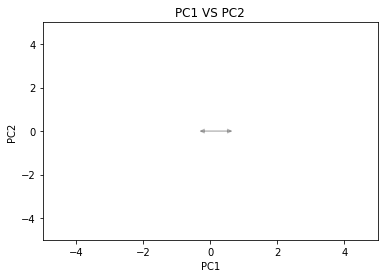


Length of array: 7
Original data: 
[[0 2 0 2 4 5]
 [0 2 0 1 5 5]
 [0 2 0 0 5 5]
 [0 2 0 0 6 5]
 [0 2 0 3 3 5]
 [0 2 0 2 3 5]
 [0 2 0 2 4 5]]
Projection matrix: 
[[-0.          0.          1.          0.          0.          0.        ]
 [-0.          0.          0.          1.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.        ]
 [-0.71443293  0.69970393  0.          0.          0.          0.        ]
 [ 0.69970393  0.71443293  0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          1.          0.        ]]
PCA result: 
[[-0.6081628   0.19570713  0.          0.          0.          0.        ]
 [ 0.80597406  0.21043612  0.          0.          0.          0.        ]
 [ 1.52040699 -0.48926781  0.          0.          0.          0.        ]
 [ 2.22011092  0.22516511  0.          0.          0.          0.        ]
 [-2.02229966  0.18097813  0.          0.          0.          0.        ]

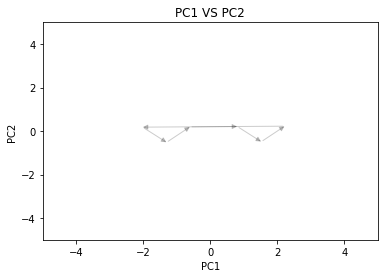


There is only one principal component.
Length of array: 3
Original data: 
[[0 2 3 0 6 2]
 [0 2 3 0 6 1]
 [0 2 3 0 6 2]]
Projection matrix: 
[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]]
PCA result: 
[[ 0.33333333  0.          0.          0.          0.          0.        ]
 [-0.66666667  0.          0.          0.          0.          0.        ]
 [ 0.33333333  0.          0.          0.          0.          0.        ]]


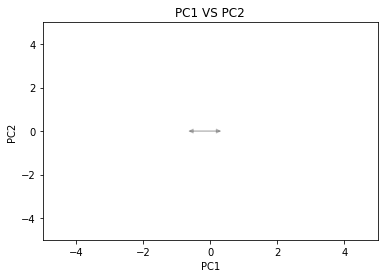


There is only one principal component.
Length of array: 3
Original data: 
[[1 2 0 0 6 6]
 [2 2 0 0 6 6]
 [1 2 0 0 6 6]]
Projection matrix: 
[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
PCA result: 
[[-0.33333333  0.          0.          0.          0.          0.        ]
 [ 0.66666667  0.          0.          0.          0.          0.        ]
 [-0.33333333  0.          0.          0.          0.          0.        ]]


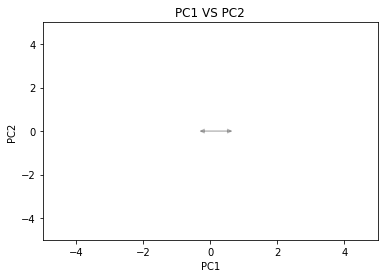


There is only one principal component.
Length of array: 3
Original data: 
[[3 3 0 0 6 6]
 [3 2 0 0 6 6]
 [3 3 0 0 6 6]]
Projection matrix: 
[[ 0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
PCA result: 
[[ 0.33333333  0.          0.          0.          0.          0.        ]
 [-0.66666667  0.          0.          0.          0.          0.        ]
 [ 0.33333333  0.          0.          0.          0.          0.        ]]


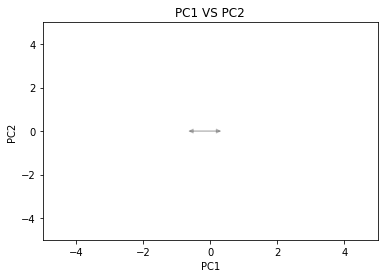


There is only one principal component.
Length of array: 3
Original data: 
[[7 2 0 0 6 9]
 [8 2 0 0 6 9]
 [7 2 0 0 6 9]]
Projection matrix: 
[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
PCA result: 
[[-0.33333333  0.          0.          0.          0.          0.        ]
 [ 0.66666667  0.          0.          0.          0.          0.        ]
 [-0.33333333  0.          0.          0.          0.          0.        ]]


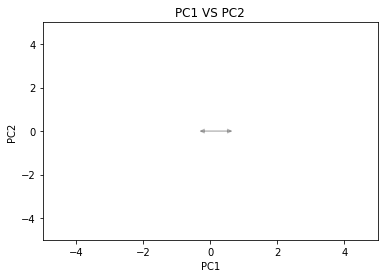


There is only one principal component.
Length of array: 3
Original data: 
[[8 2 0 0 6 9]
 [8 3 0 0 6 9]
 [8 2 0 0 6 9]]
Projection matrix: 
[[ 0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
PCA result: 
[[-0.33333333  0.          0.          0.          0.          0.        ]
 [ 0.66666667  0.          0.          0.          0.          0.        ]
 [-0.33333333  0.          0.          0.          0.          0.        ]]


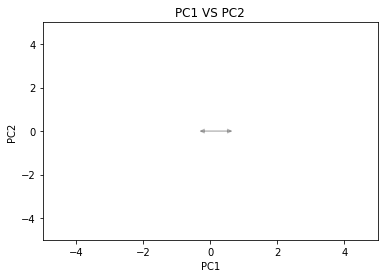


There is only one principal component.
Length of array: 3
Original data: 
[[8 4 0 0 7 9]
 [8 3 0 0 7 9]
 [8 4 0 0 7 9]]
Projection matrix: 
[[ 0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
PCA result: 
[[ 0.33333333  0.          0.          0.          0.          0.        ]
 [-0.66666667  0.          0.          0.          0.          0.        ]
 [ 0.33333333  0.          0.          0.          0.          0.        ]]


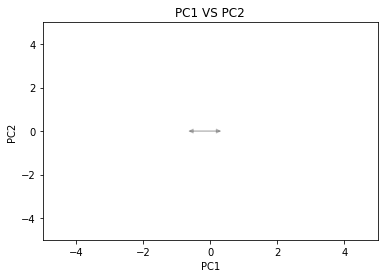

In [1]:
"""
PCA Graph
    
A PCA graph result between PC1 as x axis and PC2 as y axis after projection
"""

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
import networkx as nx
import mdp as mdp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

# Reading output.csv and normalizing the data
data = DataManipulation("../server/angle0.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

#plt.autoscale(enable=True)
for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)

transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)

G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])

for i in nx.simple_cycles(G):
    if len(i) > 50:
        continue
    i.append(i[0])
    to_be_digitized = np.array(i)
    # ls, rs, lus , rus, lm, rm
    xArray2, yArray2, zArray2, wArray2, uArray2, vArray2 = data.digitize_cycle(to_be_digitized)
    
    dimensions = np.array(list(zip(xArray2,yArray2,zArray2,wArray2,uArray2,vArray2)))
    pca_nodes = mdp.nodes.PCANode(dtype='float64',svd=True)
    pca_result = pca_nodes.execute(dimensions)
    projection_matrix = pca_nodes.get_projmatrix()
    
    all_zeros = not pca_result[:,1].any()
    if all_zeros:
        print("There is only one principal component.")
        
    print("Length of array: {0}".format(len(i)))
    print("Original data: \n{0}".format(dimensions))
    print("Projection matrix: \n{0}".format(projection_matrix))
    print("PCA result: \n{0}".format(pca_result))
    
    for j in range (len(pca_result)-1):
        plt.annotate(
                            '',
                            xy=(pca_result[:,0][j+1],pca_result[:,1][j+1]),
                            xycoords='data',
                            xytext=(pca_result[:,0][j],pca_result[:,1][j]),
                            textcoords='data',
                            verticalalignment="center", 
                            horizontalalignment="center",
                            arrowprops=dict(facecolor='black', arrowstyle="-|>", 
                                            shrinkB=0.1, alpha=0.2)
                        )
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PC1 VS PC2')
    plt.show()
    print()

In [ ]:
"""
PCA Graph

A PCA graph result between PC1 as x axis and PC3 as y axis after projection
"""

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
import networkx as nx
import mdp as mdp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

# Reading output.csv and normalizing the data
data = DataManipulation("../server/angle0.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

#plt.autoscale(enable=True)
for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)

transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)

G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])

for i in nx.simple_cycles(G):
    if len(i) > 50:
        continue
    i.append(i[0])
    to_be_digitized = np.array(i)
    # ls, rs, lus , rus, lm, rm
    xArray2, yArray2, zArray2, wArray2, uArray2, vArray2 = data.digitize_cycle(to_be_digitized)
    
    dimensions = np.array(list(zip(xArray2,yArray2,zArray2,wArray2,uArray2,vArray2)))
    pca_nodes = mdp.nodes.PCANode(dtype='float64',svd=True)
    pca_result = pca_nodes.execute(dimensions)
    projection_matrix = pca_nodes.get_projmatrix()
    
    all_zeros = not pca_result[:,2].any()
    if all_zeros:
        print("There is only one principal component.")

    print("Length of array: {0}".format(len(i)))
    print("Original data: \n{0}".format(dimensions))
    print("Projection matrix: \n{0}".format(projection_matrix))
    print("PCA result: \n{0}".format(pca_result))

    for j in range (len(pca_result)-1):
        plt.annotate(
                            '',
                            xy=(pca_result[:,0][j+1],pca_result[:,2][j+1]),
                            xycoords='data',
                            xytext=(pca_result[:,0][j],pca_result[:,2][j]),
                            textcoords='data',
                            verticalalignment="center", 
                            horizontalalignment="center",
                            arrowprops=dict(facecolor='black', arrowstyle="-|>", 
                                            shrinkB=0.1, alpha=0.2)
                        )
    plt.xlim(-NUM_OF_BINS,NUM_OF_BINS)
    plt.ylim(-NUM_OF_BINS,NUM_OF_BINS)
    plt.xlabel('PC1')
    plt.ylabel('PC3')
    plt.title('PC1 VS PC3')
    plt.show()
    print()

In [ ]:
"""
PCA Graph

A PCA graph result between PC2 as x axis and PC3 as y axis after projection
"""

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections
import networkx as nx
import mdp as mdp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

# Reading output.csv and normalizing the data
data = DataManipulation("../server/angle0.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

#plt.autoscale(enable=True)
for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)

transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)

G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])

for i in nx.simple_cycles(G):
    if len(i) > 50:
        continue
    i.append(i[0])
    to_be_digitized = np.array(i)
    # ls, rs, lus , rus, lm, rm
    xArray, yArray, zArray, wArray, uArray, vArray = data.digitize_cycle(to_be_digitized)
        
    dimensions = np.array(list(zip(xArray,yArray,zArray,wArray,uArray,vArray)))
    pca_nodes = mdp.nodes.PCANode(dtype='float64',svd=True)
    pca_result = pca_nodes.execute(dimensions)
    projection_matrix = pca_nodes.get_projmatrix()
    
    all_zeros = not pca_result[:,2].any()
    if all_zeros:
        print("There are only two principal components.")

    print("Length of array: {0}".format(len(i)))
    print("Original data: \n{0}".format(dimensions))
    print("Projection matrix: \n{0}".format(projection_matrix))
    print("PCA result: \n{0}".format(pca_result))
    
    for j in range (len(pca_result)-1):
        plt.annotate(
                            '',
                            xy=(pca_result[:,1][j+1],pca_result[:,2][j+1]),
                            xycoords='data',
                            xytext=(pca_result[:,1][j],pca_result[:,2][j]),
                            textcoords='data',
                            verticalalignment="center", 
                            horizontalalignment="center",
                            arrowprops=dict(facecolor='black', arrowstyle="-|>", 
                                            shrinkB=0.1, alpha=0.2)
                        )
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.xlabel('PC2')
    plt.ylabel('PC3')
    plt.title('PC2 VS PC3')
    plt.show()
    print()

In [ ]:
"""
3D PCA graph

A futile attempt at visualizing three principal component in a 3D graph with quiver plot
"""

%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
import networkx as nx
import mdp as mdp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# Reading output.csv and normalizing the data
data = DataManipulation("../server/angle0.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

#plt.autoscale(enable=True)
for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)

transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)

G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])

for i in nx.simple_cycles(G):
    if len(i) > 50:
        continue
    i.append(i[0])
    to_be_digitized = np.array(i)
    # ls, rs, lus , rus, lm, rm
    xArray, yArray, zArray, wArray, uArray, vArray = data.digitize_cycle(to_be_digitized)
        
    dimensions = np.array(list(zip(xArray,yArray,zArray,wArray,uArray,vArray)))
    pca_nodes = mdp.nodes.PCANode(dtype='float64',svd=True)
    pca_result = pca_nodes.execute(dimensions)
    projection_matrix = pca_nodes.get_projmatrix()

    print("Length of array: {0}".format(len(i)))
    print("Original data: \n{0}".format(dimensions))
    print("Projection matrix: \n{0}".format(projection_matrix))
    print("PCA result: \n{0}".format(pca_result))
    
    ax.quiver(pca_result[:,0][:-1], pca_result[:,1][:-1], pca_result[:,2][:-1], 
        pca_result[:,0][1:]-pca_result[:,0][:-1],pca_result[:,1][1:]-pca_result[:,1][:-1],
        pca_result[:,2][1:]-pca_result[:,2][:-1],
        cmap=plt.cm.RdYlBu)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    fig.suptitle('PCA between left light, right light and total motor')
    plt.show()
    print()

In [ ]:
"""
PCA dimensions

Result of PCA on the data after projection with 
y axis as the number of principal components.
x axis as the principal component itself
"""

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
import networkx as nx
import mdp as mdp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

# Reading output.csv and normalizing the data
data = DataManipulation("../server/angle0.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

#plt.autoscale(enable=True)
for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)

transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)

G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])

for i in nx.simple_cycles(G):
    if len(i) > 50:
        continue
    i.append(i[0])
    to_be_digitized = np.array(i)
    # ls, rs, lus , rus, lm, rm
    xArray, yArray, zArray, wArray, uArray, vArray = data.digitize_cycle(to_be_digitized)
        
    dimensions = np.array(list(zip(xArray,yArray,zArray,wArray,uArray,vArray)))
    pca_nodes = mdp.nodes.PCANode(dtype='float64',svd=True)
    pca_result = pca_nodes.execute(dimensions)
    projection_matrix = pca_nodes.get_projmatrix()

    print("Length of array: {0}".format(len(i)))
    print("Original data: \n{0}".format(dimensions))
    print("Projection matrix: \n{0}".format(projection_matrix))
    print("PCA result: \n{0}".format(pca_result))
    
    for j in range (len(pca_result)-1):
        plt.scatter(pca_result[:,0][j], [1]*pca_result[:,0][j].size)
        plt.scatter(pca_result[:,1][j], [2]*pca_result[:,1][j].size)
        plt.scatter(pca_result[:,2][j], [3]*pca_result[:,2][j].size)
        plt.scatter(pca_result[:,3][j], [4]*pca_result[:,3][j].size)
        plt.scatter(pca_result[:,4][j], [5]*pca_result[:,4][j].size)
        plt.scatter(pca_result[:,5][j], [6]*pca_result[:,5][j].size)

    plt.xlim(-10,10)
    plt.ylim(0,7)
    plt.xlabel('PCA line')
    plt.ylabel('PC number')
    plt.title('Full PCA line')
    plt.show()
    print()

In [ ]:
"""
    Same code as above, just a different file since it is so stuffed up to graph it in 1 cell
"""

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
import networkx as nx
import mdp as mdp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from DataManipulation import DataManipulation

# Reading output.csv and normalizing the data
data = DataManipulation("../server/output2.csv")
NUM_OF_BINS = data.get_NUM_OF_BINS()
data.normalized_motor()
ls = np.floor(data.get_data()['left sensor'].values * NUM_OF_BINS).astype(int)
rs = np.floor(data.get_data()['right sensor'].values * NUM_OF_BINS).astype(int)
lus = np.floor(data.get_data()['left ultrasound sensor'].values * NUM_OF_BINS).astype(int)
rus = np.floor(data.get_data()['right ultrasound sensor'].values * NUM_OF_BINS).astype(int)
lm = np.floor((0.5*data.get_data()['left motor'].values + 0.5) * NUM_OF_BINS).astype(int)
rm = np.floor((0.5*data.get_data()['right motor'].values + 0.5) * NUM_OF_BINS).astype(int)

#plt.autoscale(enable=True)
for i in range(len(ls)):
            if ls[i] == NUM_OF_BINS:
                ls[i] = NUM_OF_BINS-1
            if rs[i] == NUM_OF_BINS:
                rs[i] == NUM_OF_BINS-1

            if lus[i] == NUM_OF_BINS:
                lus[i] == NUM_OF_BINS-1
            if rus[i] == NUM_OF_BINS:
                rus[i] == NUM_OF_BINS-1
                
            if lm[i] == NUM_OF_BINS:
                lm[i] == NUM_OF_BINS-1
            if rm[i] == NUM_OF_BINS:
                rm[i] == NUM_OF_BINS-1
#print(lm,rm)

#Making a state transition between sensor and motor values
sensorimotor_state = data.convert_values_to_bins(ls,rs,lus,rus,lm,rm)
ls = data.remove_continous_state(ls)
rs = data.remove_continous_state(rs)
lus = data.remove_continous_state(lus)
rus = data.remove_continous_state(rus)
lm = data.remove_continous_state(lm)
rm = data.remove_continous_state(rm)
transition_array = data.remove_continous_state()
transition_with_frequency = data.transition_frequency(transition_array)
G = nx.DiGraph()
G.add_nodes_from(transition_with_frequency.keys())
for i,j in transition_with_frequency.items():
    for k,l in j.items():
        G.add_weighted_edges_from([(i, k, l)])

for i in nx.simple_cycles(G):
    if len(i) > 50:
        continue
    i.append(i[0])
    to_be_digitized = np.array(i)
    # ls, rs, lus , rus, lm, rm
    xArray, yArray, zArray, wArray, uArray, vArray = data.digitize_cycle(to_be_digitized)
        
    dimensions = np.array(list(zip(xArray,yArray,zArray,wArray,uArray,vArray)))
    pca_nodes = mdp.nodes.PCANode(dtype='float64',svd=True)
    pca_result = pca_nodes.execute(dimensions)
    projection_matrix = pca_nodes.get_projmatrix()

    print("Length of array: {0}".format(len(i)))
    print("Original data: \n{0}".format(dimensions))
    print("Projection matrix: \n{0}".format(projection_matrix))
    print("PCA result: \n{0}".format(pca_result))
    
    for j in range (len(pca_result)-1):
        plt.scatter(pca_result[:,0][j], [1]*pca_result[:,0][j].size)
        plt.scatter(pca_result[:,1][j], [2]*pca_result[:,1][j].size)
        plt.scatter(pca_result[:,2][j], [3]*pca_result[:,2][j].size)
        plt.scatter(pca_result[:,3][j], [4]*pca_result[:,3][j].size)
        plt.scatter(pca_result[:,4][j], [5]*pca_result[:,4][j].size)
        plt.scatter(pca_result[:,5][j], [6]*pca_result[:,5][j].size)

    plt.xlim(-10,10)
    plt.ylim(0,7)
    plt.xlabel('PCA line')
    plt.ylabel('PC number')
    plt.title('Full PCA line')
    plt.show()
    print()